In [1]:
import cv2 
from PIL import Image 
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

img_dir = 'train'
mask_dir = 'train/masks'
excel_file = 'train/classif.xlsx'

# Load images
def load_images(img_dir, count):
    images = []
    for i in range(1, count + 1):
        img_path = os.path.join(img_dir, f"{i}.jpg")
        if os.path.exists(img_path):
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB format
            images.append(img)
        else:
            print(f"Image {img_path} not found.")
    return images

# Load masks
def load_masks(mask_dir, count):
    masks = []
    for i in range(1, count + 1):
        mask_path = os.path.join(mask_dir, f"binary_{i}.tif")
        if os.path.exists(mask_path):
            mask = Image.open(mask_path)
            mask = np.array(mask)
            masks.append(mask)
        else:
            print(f"Mask {mask_path} not found.")
    return masks

# Load classification file
def load_classification(excel_file):
    if os.path.exists(excel_file):
        return pd.read_excel(excel_file)
    else:
        print(f"Excel file {excel_file} not found.")
        return None
    
# Print        
images = load_images(img_dir, 250)
masks = load_masks(mask_dir, 250)
classif_df = load_classification(excel_file)    

print(f"Loaded {len(images)} images and {len(masks)} masks.")
print(classif_df.head())


Loaded 250 images and 250 masks.
   ID bug type         species
0   1      Bee  Apis mellifera
1   2      Bee  Apis mellifera
2   3      Bee  Apis mellifera
3   4      Bee  Apis mellifera
4   5      Bee  Apis mellifera


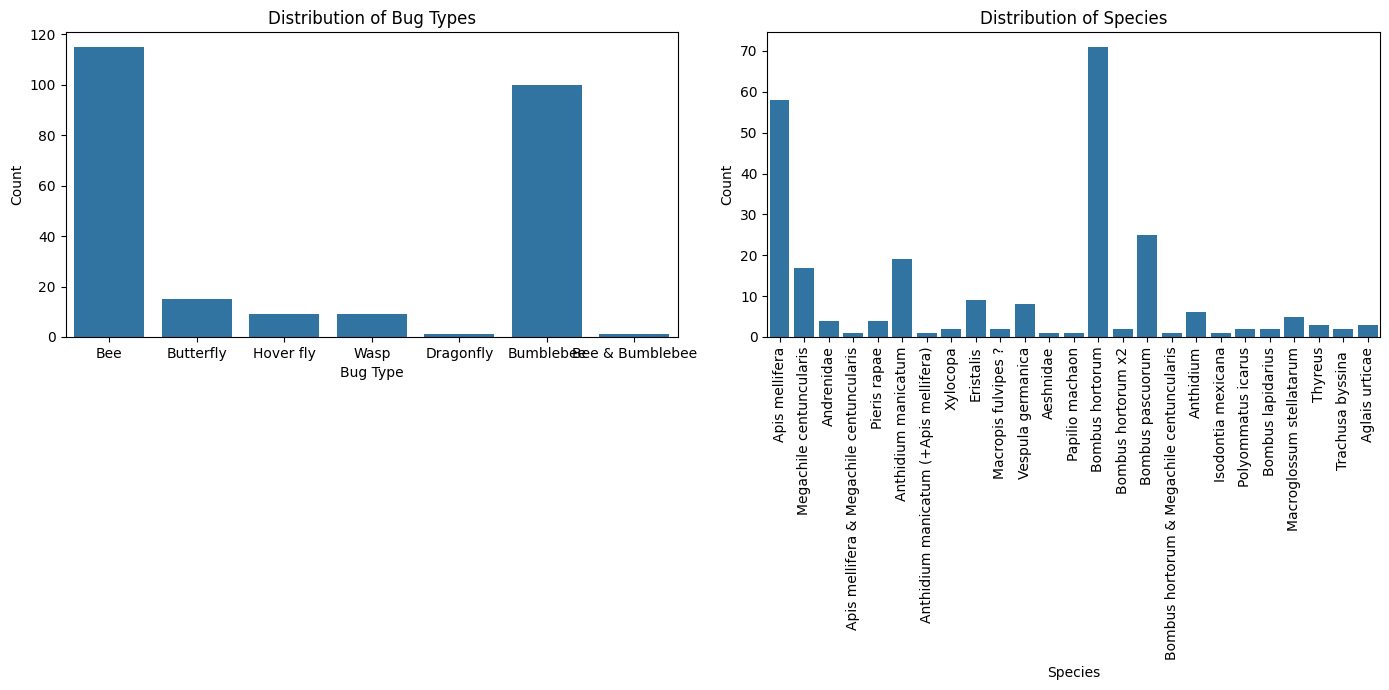

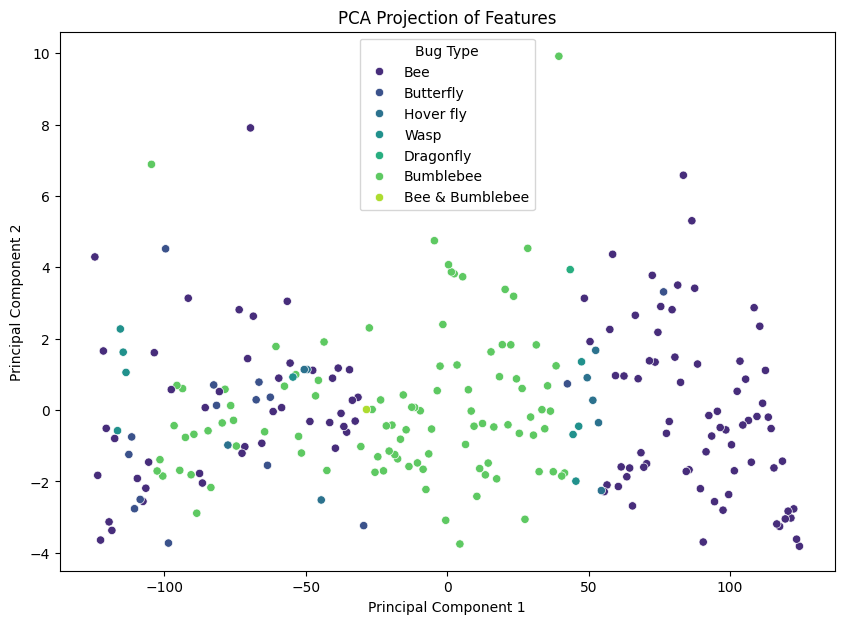

In [3]:
data_feature_fille = 'data_features.csv'
features_df = pd.read_csv(data_feature_fille)
all_data_df = pd.concat([classif_df, features_df], axis=1)

# 可视化不同昆虫类型和物种的分布
def plot_bug_distributions(df):
    plt.figure(figsize=(14, 7))

    # 昆虫类型分布
    plt.subplot(1, 2, 1)
    sns.countplot(x='bug type', data=df)
    plt.title('Distribution of Bug Types')
    plt.xlabel('Bug Type')
    plt.ylabel('Count')

    # 昆虫物种分布
    plt.subplot(1, 2, 2)
    sns.countplot(x='species', data=df)
    plt.title('Distribution of Species')
    plt.xlabel('Species')
    plt.ylabel('Count')
    plt.xticks(rotation=90)

    plt.tight_layout()
    plt.show()

# 调用函数进行分布可视化
plot_bug_distributions(all_data_df)

# 使用PCA进行特征降维
def plot_pca_projection(features_df):
    # 将数据标准化
    features = features_df.select_dtypes(include=[np.number])  # 只选择数值型特征
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(features)
    
    # 创建PCA结果的DataFrame
    pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
    pca_df = pd.concat([pca_df, classif_df[['bug type']]], axis=1)

    plt.figure(figsize=(10, 7))
    sns.scatterplot(x='PC1', y='PC2', hue='bug type', data=pca_df, palette='viridis')
    plt.title('PCA Projection of Features')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(title='Bug Type', loc='best')
    plt.show()

# 调用函数进行PCA投影可视化
plot_pca_projection(all_data_df)

/Users/zelin/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


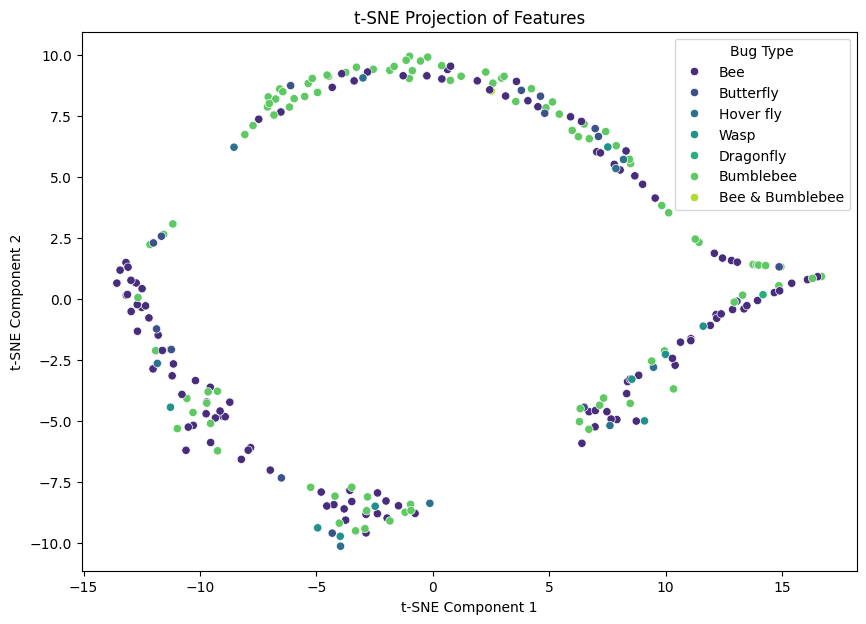

/Users/zelin/Library/Python/3.9/lib/python/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


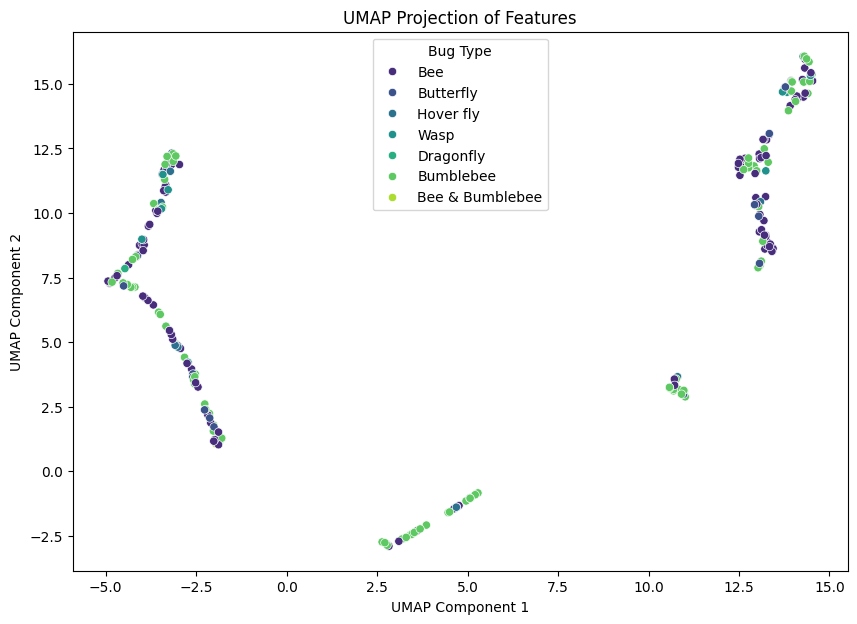

In [5]:
from sklearn.manifold import TSNE
import umap

def plot_tsne_projection(features_df, classif_df):
    features = features_df.select_dtypes(include=[np.number])  # 只选择数值型特征
    tsne = TSNE(n_components=2, random_state=42)
    tsne_result = tsne.fit_transform(features)
    
    # 创建t-SNE结果的DataFrame
    tsne_df = pd.DataFrame(data=tsne_result, columns=['tSNE1', 'tSNE2'])
    tsne_df = pd.concat([tsne_df, classif_df[['bug type']]], axis=1)

    plt.figure(figsize=(10, 7))
    sns.scatterplot(x='tSNE1', y='tSNE2', hue='bug type', data=tsne_df, palette='viridis')
    plt.title('t-SNE Projection of Features')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.legend(title='Bug Type', loc='best')
    plt.show()

# 使用UMAP进行特征降维
def plot_umap_projection(features_df, classif_df):
    features = features_df.select_dtypes(include=[np.number])  # 只选择数值型特征
    umap_reducer = umap.UMAP(n_components=2, random_state=42)
    umap_result = umap_reducer.fit_transform(features)
    
    # 创建UMAP结果的DataFrame
    umap_df = pd.DataFrame(data=umap_result, columns=['UMAP1', 'UMAP2'])
    umap_df = pd.concat([umap_df, classif_df[['bug type']]], axis=1)

    plt.figure(figsize=(10, 7))
    sns.scatterplot(x='UMAP1', y='UMAP2', hue='bug type', data=umap_df, palette='viridis')
    plt.title('UMAP Projection of Features')
    plt.xlabel('UMAP Component 1')
    plt.ylabel('UMAP Component 2')
    plt.legend(title='Bug Type', loc='best')
    plt.show()

# 调用函数进行t-SNE投影可视化
plot_tsne_projection(features_df, classif_df)

# 调用函数进行UMAP投影可视化
plot_umap_projection(features_df, classif_df)

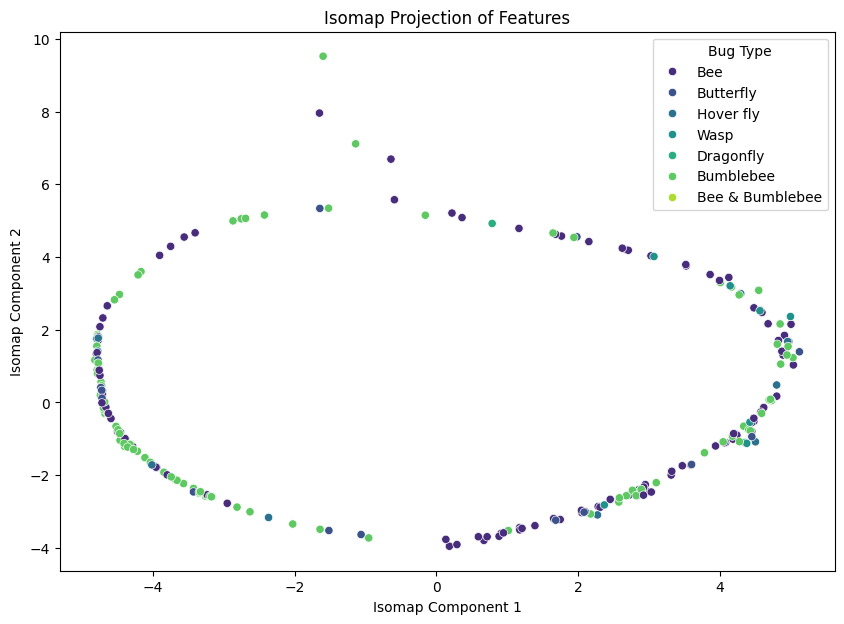

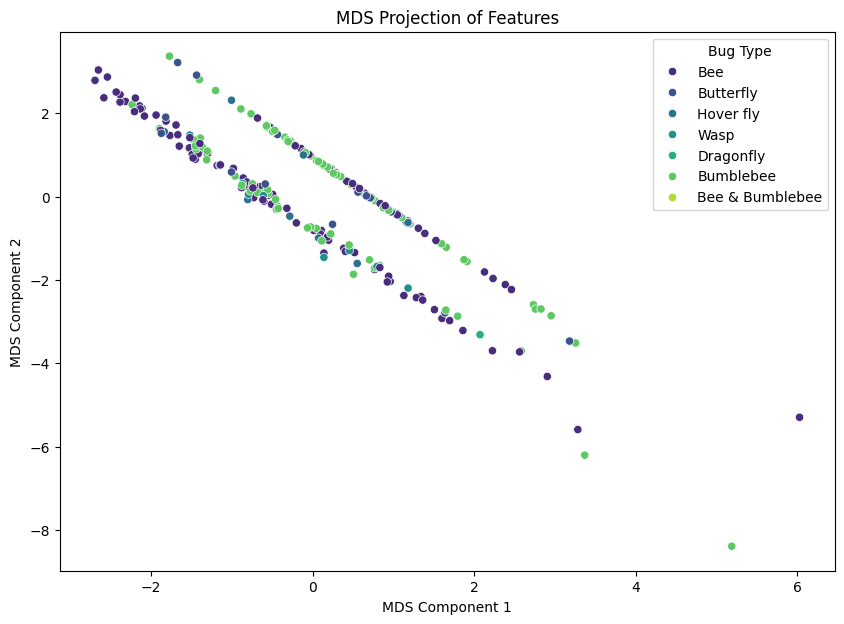

In [6]:
from sklearn.manifold import Isomap, MDS

def plot_isomap_projection(features_df, classif_df):
    features = features_df.select_dtypes(include=[np.number])  # 只选择数值型特征
    isomap = Isomap(n_components=2)
    isomap_result = isomap.fit_transform(features)
    
    # 创建Isomap结果的DataFrame
    isomap_df = pd.DataFrame(data=isomap_result, columns=['ISOMAP1', 'ISOMAP2'])
    isomap_df = pd.concat([isomap_df, classif_df[['bug type']]], axis=1)

    plt.figure(figsize=(10, 7))
    sns.scatterplot(x='ISOMAP1', y='ISOMAP2', hue='bug type', data=isomap_df, palette='viridis')
    plt.title('Isomap Projection of Features')
    plt.xlabel('Isomap Component 1')
    plt.ylabel('Isomap Component 2')
    plt.legend(title='Bug Type', loc='best')
    plt.show()

# 使用MDS进行特征降维
def plot_mds_projection(features_df, classif_df):
    features = features_df.select_dtypes(include=[np.number])  # 只选择数值型特征
    mds = MDS(n_components=2, random_state=42)
    mds_result = mds.fit_transform(features)
    
    # 创建MDS结果的DataFrame
    mds_df = pd.DataFrame(data=mds_result, columns=['MDS1', 'MDS2'])
    mds_df = pd.concat([mds_df, classif_df[['bug type']]], axis=1)

    plt.figure(figsize=(10, 7))
    sns.scatterplot(x='MDS1', y='MDS2', hue='bug type', data=mds_df, palette='viridis')
    plt.title('MDS Projection of Features')
    plt.xlabel('MDS Component 1')
    plt.ylabel('MDS Component 2')
    plt.legend(title='Bug Type', loc='best')
    plt.show()

# 调用函数进行Isomap投影可视化
plot_isomap_projection(features_df, classif_df)

# 调用函数进行MDS投影可视化
plot_mds_projection(features_df, classif_df)